In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('./water-q.csv')
df.head()


,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed,Data Source
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,...,NaN,NaN,.070||King County Nstream Database/B53311,NaN,NaN,NaN,NaN,none,NaN,KCEL
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,0321,Crisp Creek mouth at SE Green Valley Rd,...,NaN,NaN,.727||King County Nstream Database/RS2,NaN,NaN,NaN,NaN,NaN,NaN,KCEL
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0512,Ship Canal above locks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,06/25/2013,KCEL
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0540,Ship Canal near Montlake Bridge,...,0.002,0.005,NaN,NaN,NaN,NaN,NaN,SM4500-P-F,02/15/2012,KCEL
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,0804,Lake Washington north end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,NaN,KCEL


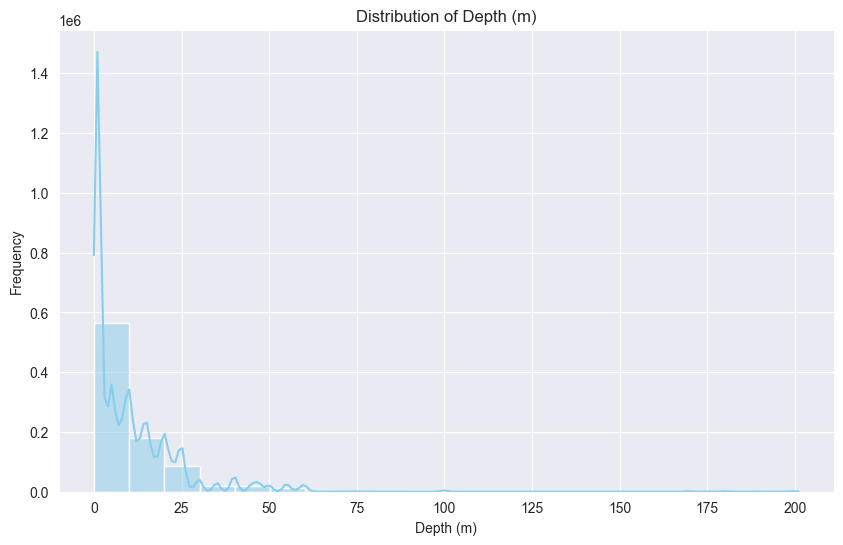

In [52]:
# Plotting the distribution of 'Depth (m)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Depth (m)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Depth (m)')
plt.xlabel('Depth (m)')
plt.ylabel('Frequency')
plt.show()

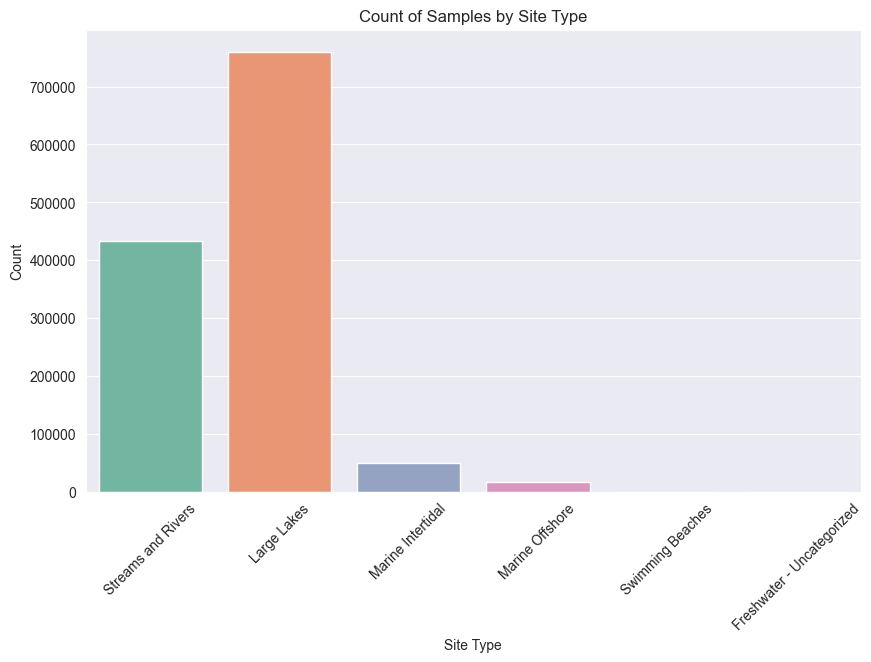

In [53]:
# Plotting a count plot for 'Site Type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Site Type', palette='Set2')
plt.title('Count of Samples by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

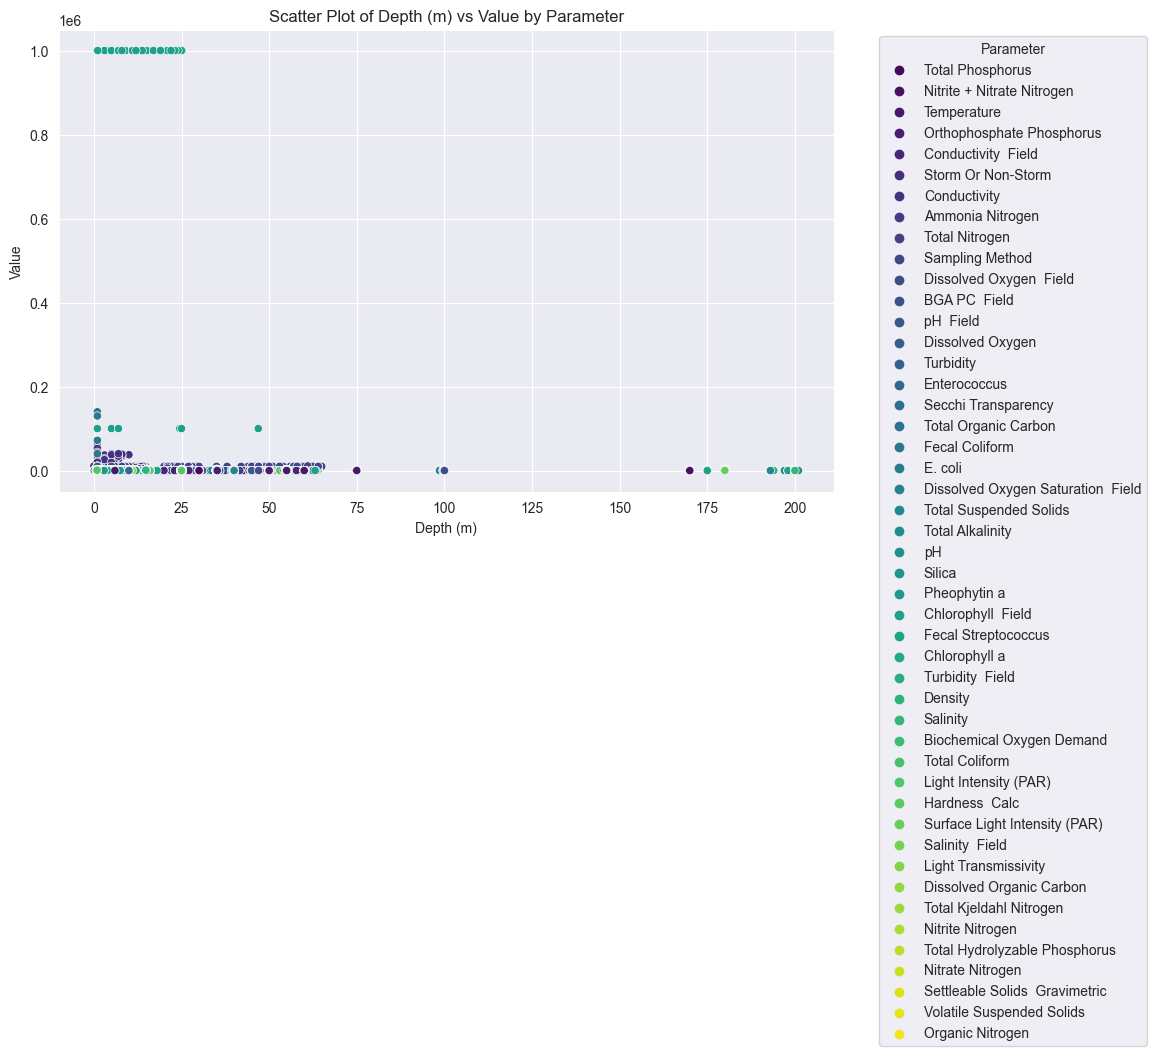

In [54]:
# Plotting a scatter plot for 'Depth (m)' vs 'Value' by 'Parameter'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Depth (m)', y='Value', hue='Parameter', palette='viridis')
plt.title('Scatter Plot of Depth (m) vs Value by Parameter')
plt.xlabel('Depth (m)')
plt.ylabel('Value')
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

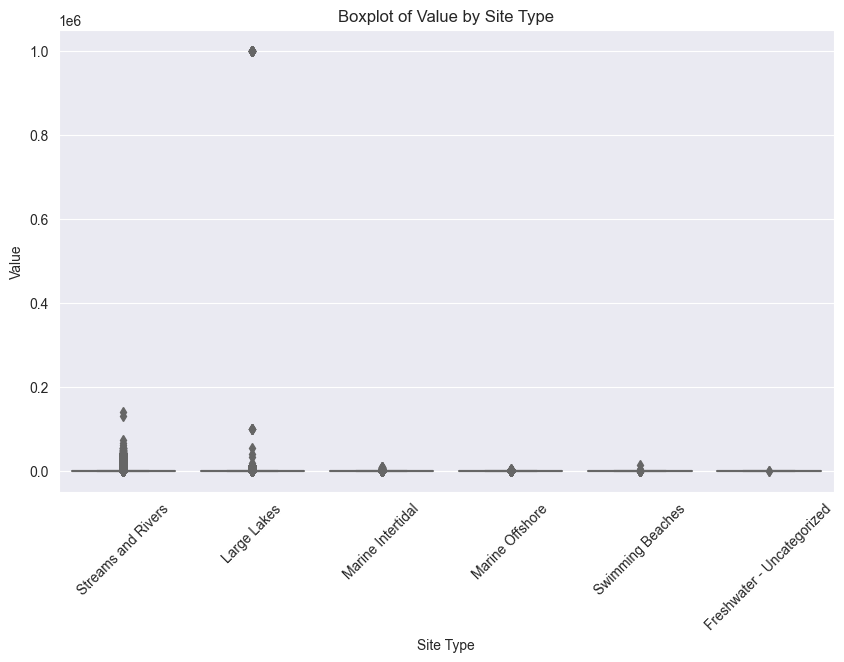

In [55]:
# Plotting a boxplot for 'Value' by 'Site Type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Site Type', y='Value', palette='Set3')
plt.title('Boxplot of Value by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_20776\2637975288.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Parameter', y='Value', palette='Set1', ci=None)


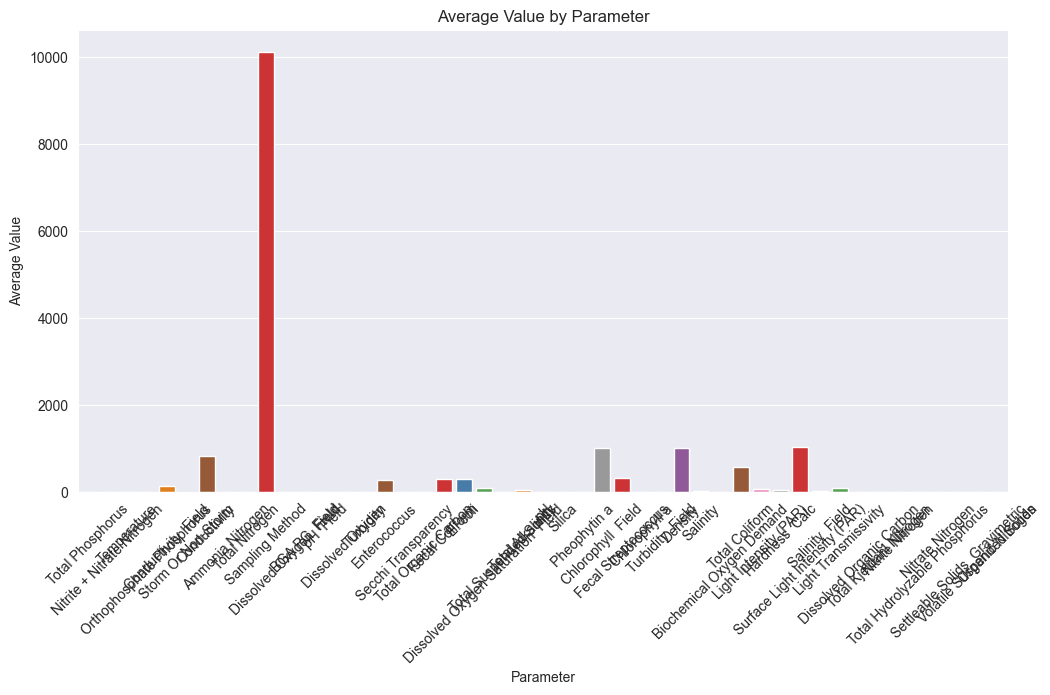

In [56]:
# Plotting a barplot for average 'Value' by 'Parameter'
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Parameter', y='Value', palette='Set1', ci=None)
plt.title('Average Value by Parameter')
plt.xlabel('Parameter')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

In [57]:
df = df.drop(['Site Type', 'Area', 'Site', 'Parameter', 'Units', 'Lab Qualifier', 'MDL', 'RDL', 'Text Value', 'Sample Info', 'Steward Note', 'Replicates', 'Replicate Of', 'Method', 'Date Analyzed', 'Data Source', 'Sample Number', 'Locator', 'Collect DateTime', 'Sample ID', 'Grab ID', 'Profile ID'], axis=1)
df.head()

,Depth (m),Value,QualityId
0,1.0,0.07000,2
1,1.0,0.72700,2
2,1.0,18.90000,2
3,1.0,0.00724,2
4,4.2,8.94000,2


In [58]:
df.shape


(1259444, 3)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259444 entries, 0 to 1259443
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Depth (m)  882666 non-null   float64
 1   Value      1150359 non-null  float64
 2   QualityId  1259444 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 28.8 MB


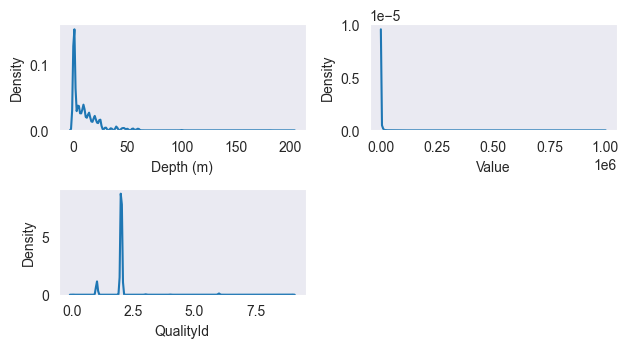

In [60]:
r=3
c=2
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.kdeplot(df[i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [61]:
df.skew()

Depth (m)      4.305076
Value        156.557872
QualityId      5.333810
dtype: float64

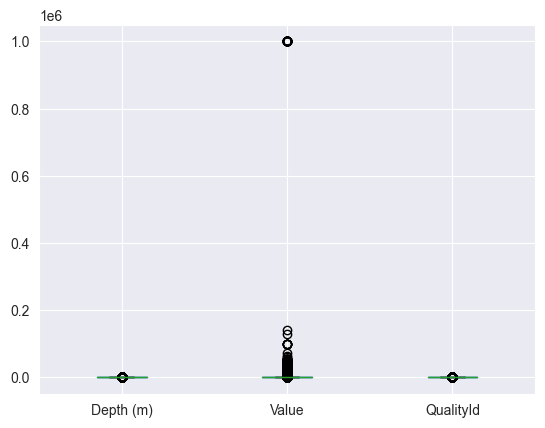

In [62]:
df.boxplot()
plt.show()

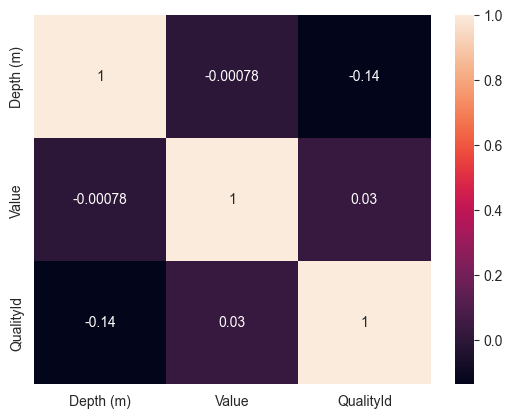

In [63]:
sns.heatmap(df.corr(),annot=True)
plt.show()